# <center> Hospital Readmissions Amongst Diabetic Patients - Predictive Analysis </center>

<b> Project Overview: </b>

For some time, those responsible for the governing and supervising of the nation’s healthcare realm have identified a persistent trend in the number of patients being re-hospitalized shortly after their initial discharge. As a result of this discovery, many medical organizations around the world are now faced with financial forfeitures imposed by governmental agencies as penalties due too said, excessive readmissions. Furthermore, these same organizations are determined to discover the most feasible solution, to reduce the ever-increasing readmission rates amongst their patients while maintaining exceptional quality of care towards their patients. 

This analysis utilizes a medical claims dataset of diabetic patients who had an inpatient encounter at a medical facility in the United States. By way of a machine learning based algorithm, this project intends to answer the question of: (1) what attributes exhibits the strongest contribution to the prediction of rehospitalizations amongst diabetic patients? (2) how accurate can readmissions be predicted utilizing the forementioned medical dataset?

### Imported Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import pylab
import matplotlib.pyplot as plt 
import matplotlib.pylab as plt
import matplotlib
import matplotlib.image as mpimg
from matplotlib import style
import math

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## <center> Exploratory Data Analysis</center>

<i><center>This portion of the data analysis reflects all preliminary data visualizations along with code blocks demonstrating feature engineering and any data preprocessing steps necessary before model construction.
</i></center>

In [2]:
# read in the csv file of the dataset to be used for analysis
# direct link to data - https://www.kaggle.com/datasets/brandao/diabetes?select=diabetic_data.csv
df_readmission = pd.read_csv('diabetic_data.csv')

In [3]:
# display first five rows of the dataset
df_readmission.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# display last five rows of the dataset
df_readmission.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
# display the shape (number of rows/columns) of the dataset
df_readmission.shape

(101766, 50)

In [6]:
# provide summary statistics of the dataset
df_readmission.describe(include = 'all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# use the .info function to show all column attributes and associating data types 
df_readmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# check for any duplicated rows within the dataset
duplicated_rows = df_readmission[df_readmission.duplicated()]
print('The number of duplicated rows are: ', duplicated_rows.shape)

The number of duplicated rows are:  (0, 50)


- Utilizing the head and tail functions provided users with a brief overview of the dataset used for analysis. The results returned by this function revealed that missing/unknown row values are denoted using the '?' special character. To ensure that those missing values are properly reported, the '?'is replaced with the NumPy's 'nan' value.

In [9]:
# replace '?' special character w/'nan' value
df_readmission = df_readmission.replace('?', np.nan)

# identify  the number and percentage of null/missing values for each attribute  
percent_missing = df_readmission.isnull().sum() * 100 / len(df_readmission)
missing_value_df = pd.DataFrame({'missing_null': df_readmission.isnull().sum(),
                                 'percent_missing': percent_missing})

# display the count and percentage of null/missing values for each attribute 
round(missing_value_df,2)

,missing_null,percent_missing
encounter_id,0,0.00
patient_nbr,0,0.00
race,2273,2.23
gender,0,0.00
age,0,0.00
weight,98569,96.86
admission_type_id,0,0.00
discharge_disposition_id,0,0.00
admission_source_id,0,0.00
time_in_hospital,0,0.00


In [10]:
# explore the sparsity of data frame
sparse_check = (df_readmission.to_numpy() == 0).mean()
print("The sparsity of this dataframe (as a decimal) is: ", sparse_check)
print("The sparsity of this dataframe (as a percent) is: ", "{:.0%}".format(sparse_check))

The sparsity of this dataframe (as a decimal) is:  0.056932963858263075
The sparsity of this dataframe (as a percent) is:  6%


- With approximately 97% of the 'weight' attribute values missing from the dataset, this column is removed from the data frame as it holds no value to the analysis. Furthermore, the 'payer_code' and 'medical_specialty' attributes are missing over 50% of their values. It was decided that these two attributes also fail to hold any statistical significance and are not necessary for analysis.

In [11]:
# remove weight, payer code, and medical specialty features
df_readmission.drop(['weight',
                     'payer_code',
                     'medical_specialty'], axis = 1, inplace = True)

# display updated shape of data frame
df_readmission.shape

(101766, 47)

- Taking into consideration the missing values associated with the 'race' and 'diag_1' variables, it was determined to only remove the rows containing missing values rather than the entire columns. 

  Regarding the 'diag_2', and 'diag_3' variables, for the purpose of this analysis, we only want to consider the first initial diagnose thus requiring the removal of the secondary and additional diagnoses.

In [12]:
# remove the rows in the race and diag_1 columns containing missing values 
df_readmission = df_readmission.dropna(subset=['race', 'diag_1'])

# display updated shape of data frame
print("Updated shape of data frame following removal of missing values:")
print(df_readmission.shape)

# remove diag_2 and diag_3 features
df_readmission.drop(['diag_2',
                     'diag_3',], axis = 1, inplace = True)

# display updated shape of data frame
print("Updated shape of data frame following removal of diag features:")
print(df_readmission.shape)

Updated shape of data frame following removal of missing values:
(99474, 47)
Updated shape of data frame following removal of diag features:
(99474, 45)


- This dataset contains an array of diabetic medications highlighting the change in dosage (increase or reduction) during each patient's encounter in the hospital. For this specific analysis the diabetic medications are not to be considered; therefore, those features will be removed from the data frame. 

   As a proposal/recommendation of future studies using this dataset, analysts could solely analysis the medications to determine if they have any associations on patient rehospitalizations. It is important to note that features: 'examide' and 'citoglipton' contains the same row values and would need to be removed before performing any sort of analysis. The code block used to make this assessment is presented below:

In [13]:
# create an array of only the diabetic medications 
medications = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
               'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
               'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
               'examide','citoglipton','insulin','glyburide-metformin',
               'glipizide-metformin','glimepiride-pioglitazone',
               'metformin-rosiglitazone','metformin-pioglitazone']

In [14]:
# remove medications from data frame
for i in medications:
    df_readmission.drop([i], axis = 1, inplace = True)

# display updated shape of data frame
df_readmission.shape

(99474, 22)

<b><u>
Features: 
</u></b>
<b>
- encounter_id
- patient_nbr
</b>

These two features are unique identifiers highlighting patients and their encounters (visits) at the hospital. Some patients have multiple encounters at the hospital, thus introduction the notion of bias that will greatly impact any predictive models made using this dataset. To remove this form of bias, only the first encounter will be considered of those patients with multiple encounters.

In [15]:
# remove encounters from dataframe of those patients with more than a single encounter
df_readmission = df_readmission.drop_duplicates(subset = ['patient_nbr'], keep = 'first')
# display updated shape of dataframe
df_readmission.shape

(69659, 22)

In [16]:
# remove encounter_id and patient_nbr variables
df_readmission.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)

# display updated shape of dataframe
df_readmission.shape

(69659, 20)

<b><u>Target Variable: readmitted</u></b>

Target Variable Summary Statistics
count     69659
unique        3
top          NO
freq      41661
Name: readmitted, dtype: object

Target Variable Unique Labels
NO     41661
>30    21833
<30     6165
Name: readmitted, dtype: int64


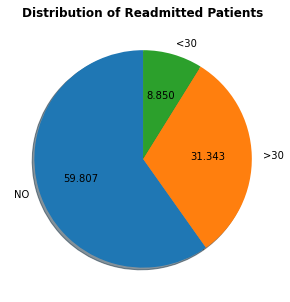

In [17]:
# show the summary statistics of only the target variable
print("Target Variable Summary Statistics")
print(df_readmission['readmitted'].describe())
print("")

# display the unique labels along with the value count
print("Target Variable Unique Labels")
print(df_readmission['readmitted'].value_counts())

# pie chart showing the distribution of the target variable
plt.figure(figsize=(5,5))
plt.title("Distribution of Readmitted Patients", fontweight='bold')
plt.pie(df_readmission['readmitted'].value_counts(),startangle=90,autopct='%.3f',
       labels=['NO','>30','<30'],shadow=True)
plt.show()

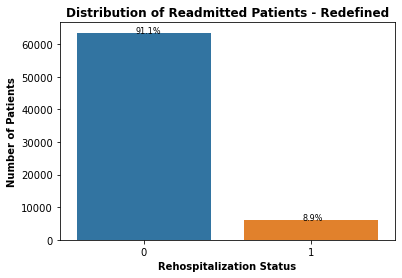

In [18]:
# target variable feature engineering
# redefine 'readmitted' attribute using the following assumptions:
# patients not readmitted within a 30-day period are to be considered not readmitted
# the value of '0' represents patients not readmitted and those not readmitted within 30-days
# the value of '1' represents those patients readmitted within 30-days
df_readmission.readmitted.replace({"NO":0, ">30":0, "<30":1}, inplace = True)

# show distribution of values
ax = sns.countplot(x = 'readmitted', data = df_readmission)
plt.figsize=(25,25)
plt.title("Distribution of Readmitted Patients - Redefined", fontweight='bold')
plt.xlabel("Rehospitalization Status", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')

# display percentage of distribution of readmitted patients
total = len(df_readmission['readmitted'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 8)

plt.show()

<b><u>Feature: race</u></b>

Unique Labels and Distribution of Values
Caucasian          53571
AfricanAmerican    12896
Hispanic            1518
Other               1178
Asian                496
Name: race, dtype: int64


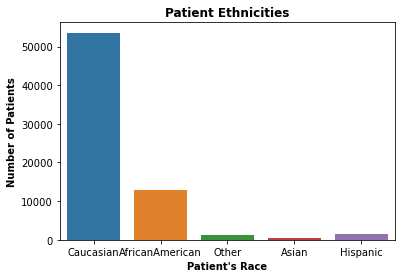

Patient Race and Rehospitalization Status Cross Table


readmitted,0,1
race,,
AfricanAmerican,11802,1094
Asian,455,41
Caucasian,48742,4829
Hispanic,1397,121
Other,1098,80


In [19]:
# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['race'].value_counts())

# display the distribution of patient ethnicities
sns.countplot(df_readmission['race'])
plt.title("Patient Ethnicities", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.xlabel("Patient's Race", fontweight='bold')
plt.show()

# cross table showing the distribution of the categorical 'race' & 'readmitted' variables
print("Patient Race and Rehospitalization Status Cross Table")
pd.crosstab(df_readmission['race'], df_readmission['readmitted'])

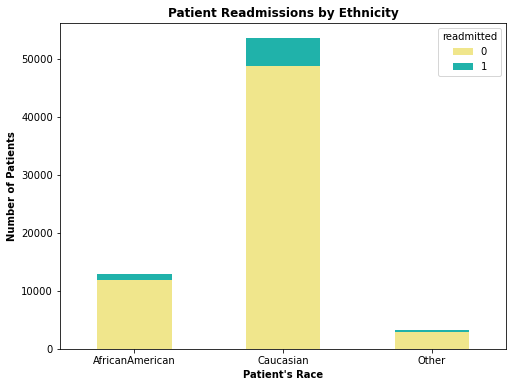

In [20]:
# redefine 'race' attribute by grouping other, Asians, and Hispanics into a single category
# this is done due to the size of distribution amongst the forementioned categories
df_readmission.race.replace({"Asian":"Other", "Hispanic":"Other"}, inplace = True)

# stacked bar graph showing the distribution of the categorical 'race' & 'readmitted' variables
tbl = pd.pivot_table(df_readmission.groupby(['race','readmitted']).size().reset_index(),
values=0,
index='race',
columns=['readmitted'],
aggfunc=np.sum)
tbl.plot(kind='bar',
         stacked=True,
         color=['khaki', 'lightseagreen'],
         figsize=(8,6))
plt.title("Patient Readmissions by Ethnicity", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.xlabel("Patient's Race", fontweight='bold')
plt.xticks(rotation=0)
plt.show()

<b><u>Feature: gender</u></b>

In [21]:
# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['gender'].value_counts())

Unique Labels and Distribution of Values
Female             37092
Male               32566
Unknown/Invalid        1
Name: gender, dtype: int64


Updated shape of data frame:
(69658, 20)


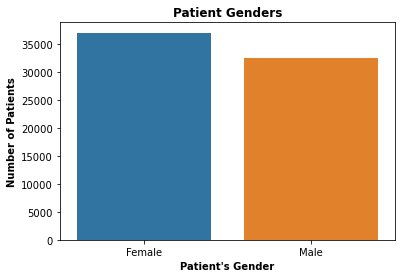

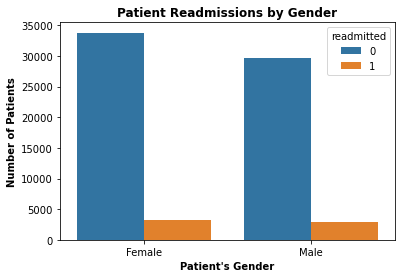

In [22]:
# remove the single unknown/invalid row in the gender column
df_readmission = df_readmission.drop(df_readmission.loc[df_readmission['gender'] == "Unknown/Invalid"].index, axis = 0)

# display updated shape of data frame
print("Updated shape of data frame:")
print(df_readmission.shape)

# display the distribution of patient genders
sns.countplot(df_readmission['gender'])
plt.title("Patient Genders", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.xlabel("Patient's Gender", fontweight='bold')
plt.show()

# display distribution of gender in relation to rehospitalization status
sns.countplot(x = "gender",
              hue = "readmitted",
              data = df_readmission)
plt.title("Patient Readmissions by Gender", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.xlabel("Patient's Gender", fontweight='bold')
plt.show()

<b><u>Feature: age</u></b>

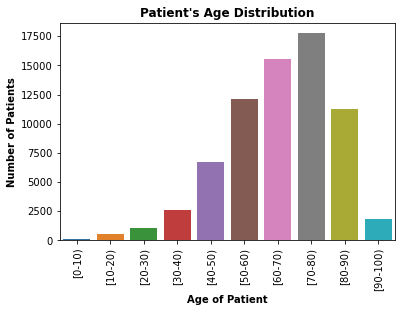

In [23]:
# show the age distribution of patients 
sns.countplot(df_readmission['age'])
plt.title("Patient's Age Distribution", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.xlabel("Age of Patient", fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Unique Labels and Distribution of Values
75    17750
65    15535
55    12152
85    11295
45     6685
35     2629
95     1842
25     1091
15      526
5       153
Name: age, dtype: int64


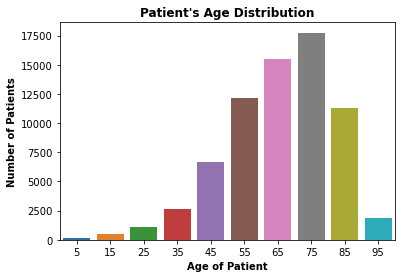

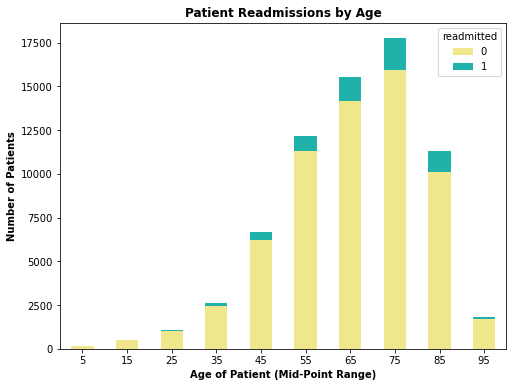

In [24]:
# redefine age values as numeric value using mid-point values
df_readmission.age = df_readmission.age.replace({"[0-10)":5,
                                                 "[10-20)":15,
                                                 "[20-30)":25,
                                                 "[30-40)":35,
                                                 "[40-50)":45,
                                                 "[50-60)":55,
                                                 "[60-70)":65,
                                                 "[70-80)":75,
                                                 "[80-90)":85,
                                                 "[90-100)":95})

# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['age'].value_counts())

# display updated age distribution
sns.countplot(df_readmission['age'])
plt.title("Patient's Age Distribution", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.xlabel("Age of Patient", fontweight='bold')
plt.show()

# stacked bar graph showing the distribution of the 'age' & 'readmitted' variables
tbl = pd.pivot_table(df_readmission.groupby(['age','readmitted']).size().reset_index(),
values=0,
index='age',
columns=['readmitted'],
aggfunc=np.sum)
tbl.plot(kind='bar',
         stacked=True,
         color=['khaki', 'lightseagreen'],
         figsize=(8,6))
plt.title("Patient Readmissions by Age", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.xlabel("Age of Patient (Mid-Point Range)", fontweight='bold')
plt.xticks(rotation=0)
plt.show()

<b><u>Feature: admisssion_type_id</u></b>

Unique Labels and Distribution of Values
1    35634
3    13606
2    12448
6     4523
5     3130
8      288
7       20
4        9
Name: admission_type_id, dtype: int64


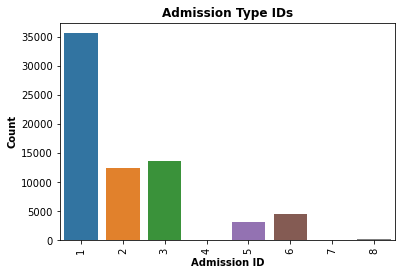

In [25]:
# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['admission_type_id'].value_counts())

# show the distribution of admission type IDs 
sns.countplot(df_readmission['admission_type_id'])
plt.title("Admission Type IDs", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Admission ID", fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Updated shape of data frame following removal of missing values:
(61717, 20)

Unique Labels and Distribution of Values
Emergency        48082
Elective         13606
Trauma Center       20
NewBorn              9
Name: admission_type_id, dtype: int64


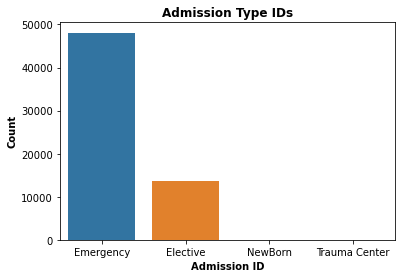

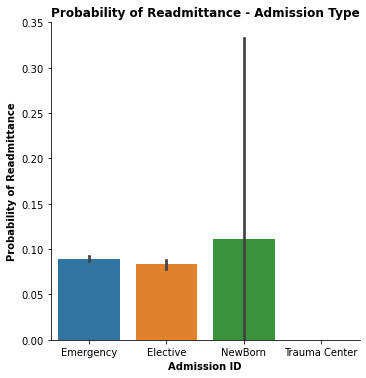

In [26]:
# redefine admission types IDs 
mapped_adminIDs = {1.0:"Emergency",
                  2.0:"Emergency",
                  3.0:"Elective",
                  4.0:"NewBorn",
                  5.0:np.nan,
                  6.0:np.nan,
                  7.0:"Trauma Center",
                  8.0:np.nan}

# replace existing IDs with new mapped IDs
df_readmission['admission_type_id'] = df_readmission['admission_type_id'].replace(mapped_adminIDs)

# remove the rows in the admission_type_id column containing missing values 
df_readmission = df_readmission.dropna(subset=['admission_type_id'])

# display updated shape of data frame
print("Updated shape of data frame following removal of missing values:")
print(df_readmission.shape)
print("")

# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['admission_type_id'].value_counts())

# display distribution of new mapped Admission IDs
sns.countplot(df_readmission['admission_type_id'])
plt.title("Admission Type IDs", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Admission ID", fontweight='bold')
plt.show()

# display admission types and the probability of readmittance 
sns.catplot(x = "admission_type_id",
            y = "readmitted",
            data = df_readmission,
            kind = "bar")
plt.title("Probability of Readmittance - Admission Type", fontweight='bold')                    
plt.ylabel("Probability of Readmittance", fontweight='bold')
plt.xlabel("Admission ID", fontweight='bold')
plt.show()

<b><u>Feature: discharge_disposition_id</u></b>

Unique Labels and Distribution of Values
1     38906
3      7271
6      7039
18     2450
22     1363
2      1272
11      944
5       770
4       493
7       354
13      237
23      228
14      170
28       61
8        59
15       40
24       25
25       16
9         6
19        6
27        3
12        2
17        2
Name: discharge_disposition_id, dtype: int64


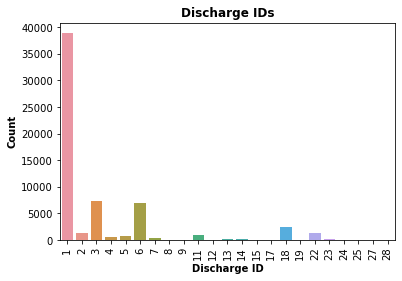

In [27]:
# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['discharge_disposition_id'].value_counts())

# show the distribution of discharge IDs 
sns.countplot(df_readmission['discharge_disposition_id'])
plt.title("Discharge IDs", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Discharge ID", fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Updated shape of data frame following removal of missing values:
(59251, 20)

Unique Labels and Distribution of Values
Discharged to Home    46247
Other                 13004
Name: discharge_disposition_id, dtype: int64


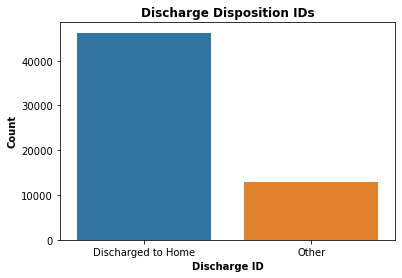

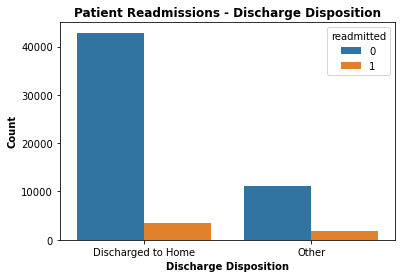

In [28]:
# redefine discharge disposition IDs 
mapped_dischargeIDs = {1:"Discharged to Home",6:"Discharged to Home",
                       8:"Discharged to Home",13:"Discharged to Home",19:"Discharged to Home",
                       2:"Other",3:"Other",4:"Other",
                       5:"Other",7:"Other",9:"Other",
                       10:"Other",11:"Other",12:"Other",
                       14:"Other",15:"Other",16:"Other",
                       17:"Other",20:"Other",22:"Other",
                       23:"Other",24:"Other",27:"Other",28:"Other",
                       18:np.nan,25:np.nan,26:np.nan}

# replace existing IDs with new mapped IDs
df_readmission['discharge_disposition_id'] = df_readmission['discharge_disposition_id'].replace(mapped_dischargeIDs)

# remove the rows in the discharge_disposition_id column containing missing values 
df_readmission = df_readmission.dropna(subset=['discharge_disposition_id'])

# display updated shape of data frame
print("Updated shape of data frame following removal of missing values:")
print(df_readmission.shape)
print("")

# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['discharge_disposition_id'].value_counts())

# display distribution of new mapped Discharge IDs
sns.countplot(df_readmission['discharge_disposition_id'])
plt.title("Discharge Disposition IDs", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Discharge ID", fontweight='bold')
plt.show()

# display distribution of gender in relation to rehospitalization status
sns.countplot(x = "discharge_disposition_id",
              hue = "readmitted",
              data = df_readmission)
plt.title("Patient Readmissions - Discharge Disposition", fontweight='bold')                    
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Discharge Disposition", fontweight='bold')
plt.show()

<b><u>Feature: admission_source_id</u></b>

Unique Labels and Distribution of Values
7     34814
1     18774
4      2025
6      1556
2       768
17      557
5       463
20      154
3        74
9        39
8        11
10        6
22        4
14        2
25        2
11        1
13        1
Name: admission_source_id, dtype: int64


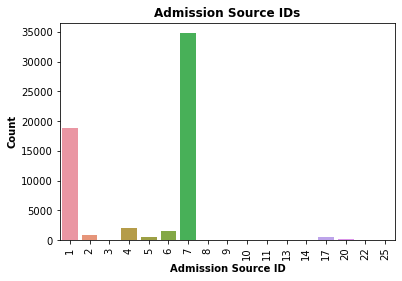

In [29]:
# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['admission_source_id'].value_counts())

# show the distribution of admission source IDs 
sns.countplot(df_readmission['admission_source_id'])
plt.title("Admission Source IDs", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Admission Source ID", fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

Updated shape of data frame following removal of missing values:
(59058, 20)

Unique Labels and Distribution of Values
Emergency    34814
Referral     19616
Transfer      4609
Other           19
Name: admission_source_id, dtype: int64


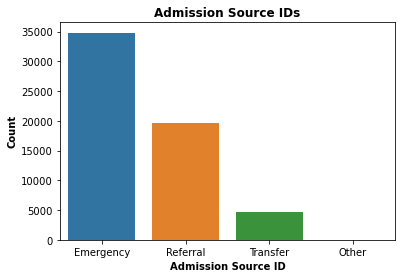

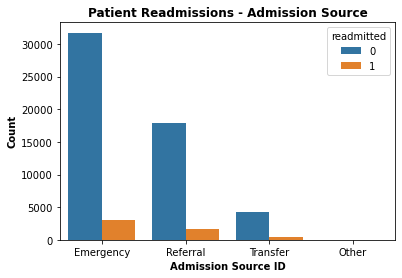

In [30]:
# redefine admission source IDs 
mapped_adminsourceIDs = {1:"Referral",2:"Referral",3:"Referral",
                         4:"Transfer",5:"Transfer",6:"Transfer",
                         10:"Transfer",17:"Transfer",25:"Transfer",
                         8:"Other",11:"Other",13:"Other",
                         14:"Other",22:"Other",7:"Emergency",
                         9:np.nan,20:np.nan}

# replace existing IDs with new mapped IDs
df_readmission['admission_source_id'] = df_readmission['admission_source_id'].replace(mapped_adminsourceIDs)

# remove the rows in the admission_source_id column containing missing values 
df_readmission = df_readmission.dropna(subset=['admission_source_id'])

# display updated shape of data frame
print("Updated shape of data frame following removal of missing values:")
print(df_readmission.shape)
print("")

# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['admission_source_id'].value_counts())

# display distribution of new mapped Admission Source IDs
sns.countplot(df_readmission['admission_source_id'])
plt.title("Admission Source IDs", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Admission Source ID", fontweight='bold')
plt.show()

# display distribution of gender in relation to rehospitalization status
sns.countplot(x = "admission_source_id",
              hue = "readmitted",
              data = df_readmission)
plt.title("Patient Readmissions - Admission Source", fontweight='bold')                    
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Admission Source ID", fontweight='bold')
plt.show()

<b><u>Feature: time_in_hospital</u></b>

Unique Labels and Distribution of Values
3     10480
2     10437
1      8795
4      7896
5      5657
6      4234
7      3330
8      2368
9      1611
10     1277
11     1010
12      770
13      648
14      545
Name: time_in_hospital, dtype: int64


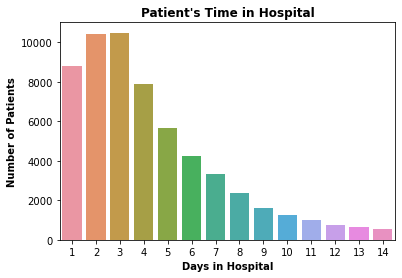

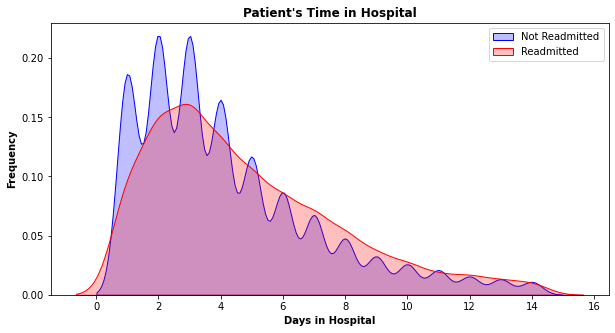

In [31]:
# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['time_in_hospital'].value_counts())

# show the distribution of the time patients spent in hospital 
sns.countplot(df_readmission['time_in_hospital'])
plt.title("Patient's Time in Hospital", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.xlabel("Days in Hospital", fontweight='bold')
plt.show()

# show the distribution of the time patients spent in hospital in relation to readmission status
# this plot will show that on average patients spent between 2-3 days in the hospital
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df_readmission.loc[(df_readmission.readmitted == 0), "time_in_hospital"],
           color = "b", shade = True, label = "Not Readmitted")

sns.kdeplot(df_readmission.loc[(df_readmission.readmitted == 1), "time_in_hospital"],
           color = "r", shade = True, label = "Readmitted")
plt.legend(loc = "upper right")
plt.title("Patient's Time in Hospital", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.xlabel("Days in Hospital", fontweight='bold')
plt.show()

<b><u>Feature: num_lab_procedures</u></b>

Unique Labels and Distribution of Values
1      1990
43     1638
44     1377
45     1375
38     1354
       ... 
121       1
111       1
118       1
132       1
104       1
Name: num_lab_procedures, Length: 113, dtype: int64


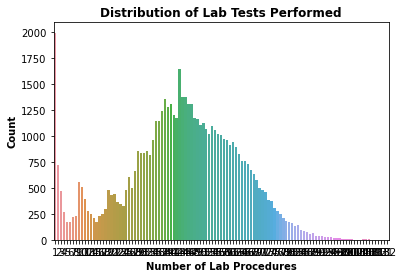

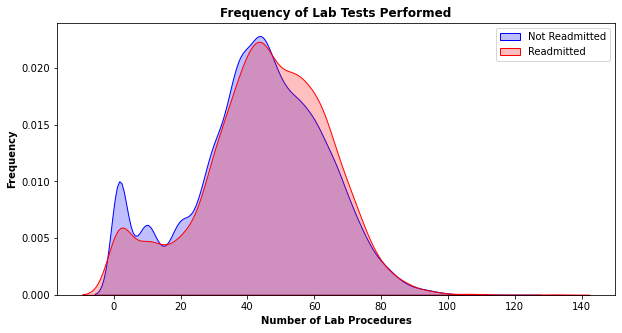

In [32]:
# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['num_lab_procedures'].value_counts())

# show the distribution of lab tests performed during a patient's encounter 
sns.countplot(df_readmission['num_lab_procedures'])
plt.title("Distribution of Lab Tests Performed", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Number of Lab Procedures", fontweight='bold')
plt.show()

# show the distribution of lab tests performed in relation to readmission status
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df_readmission.loc[(df_readmission.readmitted == 0), "num_lab_procedures"],
           color = "b", shade = True, label = "Not Readmitted")

sns.kdeplot(df_readmission.loc[(df_readmission.readmitted == 1), "num_lab_procedures"],
           color = "r", shade = True, label = "Readmitted")
plt.legend(loc = "upper right")
plt.title("Frequency of Lab Tests Performed", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.xlabel("Number of Lab Procedures", fontweight='bold')
plt.show()

<b><u>Feature: num_procedures</u></b>

Unique Labels and Distribution of Values
0    26235
1    11703
2     7541
3     5845
6     3275
4     2520
5     1939
Name: num_procedures, dtype: int64


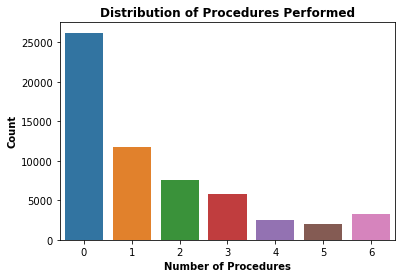

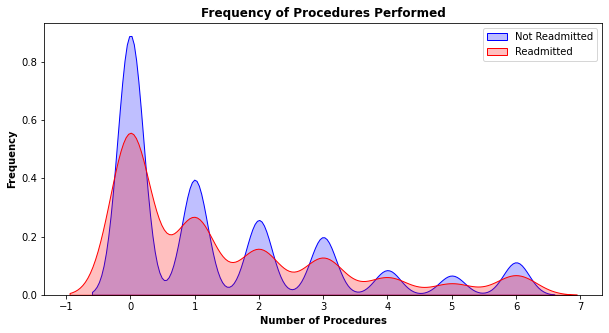

In [33]:
# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['num_procedures'].value_counts())

# show the distribution of procedures (other than lab tests) performed during a patient's encounter 
sns.countplot(df_readmission['num_procedures'])
plt.title("Distribution of Procedures Performed", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Number of Procedures", fontweight='bold')
plt.show()

# show the distribution of procedures performed relation to readmission status
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df_readmission.loc[(df_readmission.readmitted == 0), "num_procedures"],
           color = "b", shade = True, label = "Not Readmitted")

sns.kdeplot(df_readmission.loc[(df_readmission.readmitted == 1), "num_procedures"],
           color = "r", shade = True, label = "Readmitted")
plt.legend(loc = "upper right")
plt.title("Frequency of Procedures Performed", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.xlabel("Number of Procedures", fontweight='bold')
plt.show()

<b><u>Feature: num_medications</u></b>

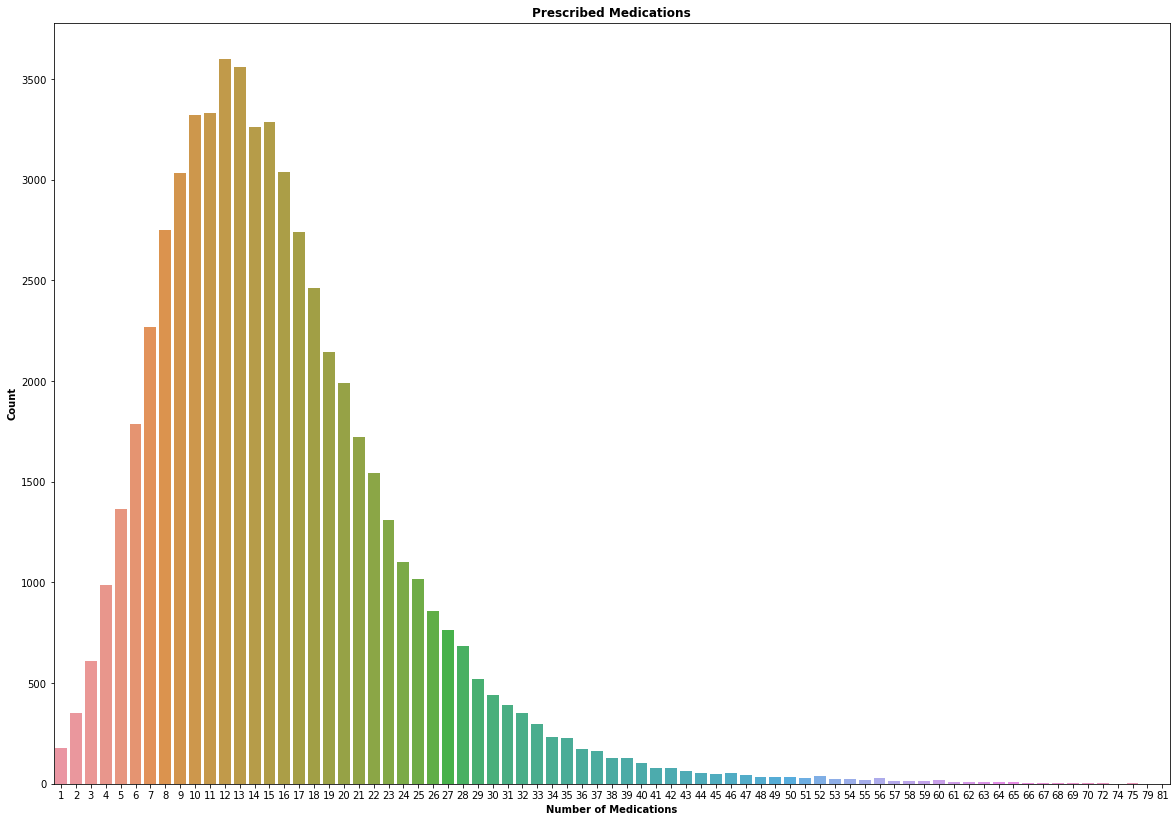

In [34]:
# show the number of medications prescribed during a patient's encounter 
fig = plt.figure(figsize=(20,14))
sns.countplot(df_readmission['num_medications'])
plt.title("Prescribed Medications", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Number of Medications", fontweight='bold')
plt.show()

<b><u>
Features: 
</u></b>
<b>
- number_outpatient
- number_emergency
- number_inpatient
</b>

These features indicate the nominal count of how frequently a patient utilized these hospital services in the year preceding their encounter

<b><u>Feature: diag_1</u></b>

In [35]:
# categorize diagnoses
def mapped_diagnoses(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

Unique Labels and Distribution of Values
Circulatory        18021
Other              10173
Respiratory         8006
Digestive           5441
Diabetes            4880
Injury              4001
Muscoloskeletal     3244
Genitourinary       2991
Neoplasms           2301
Name: diag_1, dtype: int64


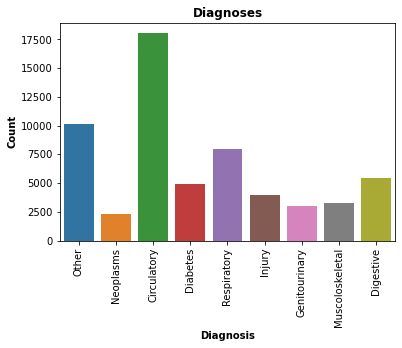

In [36]:
# replace existing diag_1 with new mapped diagnoses
df_readmission = mapped_diagnoses(df_readmission,['diag_1'])

# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['diag_1'].value_counts())

# display distribution of new mapped Discharge IDs
sns.countplot(df_readmission['diag_1'])
plt.title("Diagnoses", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Diagnosis", fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

<b><u>Feature: number_diagnoses</u></b>

Lowest Number of Diagnoses Reported 1
Highest Number of Diagnoses Reported 16

Unique Labels and Distribution of Values
14        5
15        5
11        6
12        7
10        8
13       10
16       27
1       166
2       682
3      1817
4      3557
6      5711
7      6082
8      6210
5      6953
9     27812
Name: number_diagnoses, dtype: int64


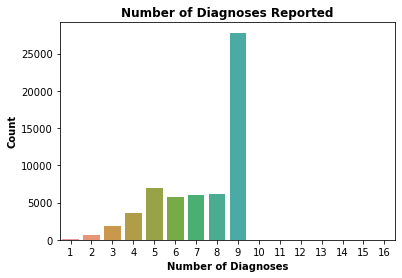

In [37]:
# return min and max number of diagnoses reported
min_val = df_readmission['number_diagnoses'].min() 
max_val = df_readmission['number_diagnoses'].max() 

print("Lowest Number of Diagnoses Reported", min_val)
print("Highest Number of Diagnoses Reported", max_val)
print("")

# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['number_diagnoses'].value_counts().sort_values(ascending = True))

# visualize the number of diagnoses reported
sns.countplot(df_readmission['number_diagnoses'])
plt.title("Number of Diagnoses Reported", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Number of Diagnoses", fontweight='bold')
plt.show()

<b><u>Feature: max_glu_serum</u></b>

In [38]:
# display the unique labels along with the value count
# this feature indicates if a patient's blood sugar levels are in the healthy range 
#used for diagnosing and monitoring diabetes
print("Unique Labels and Distribution of Values")
print(df_readmission['max_glu_serum'].value_counts())

Unique Labels and Distribution of Values
None    58442
Norm      311
>300      182
>200      123
Name: max_glu_serum, dtype: int64


Unique Labels and Distribution of Values
2    58442
0      311
1      305
Name: max_glu_serum, dtype: int64


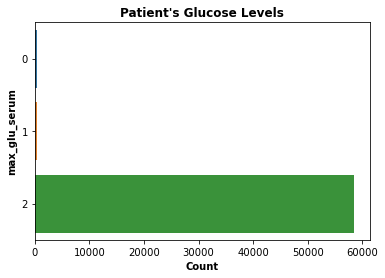

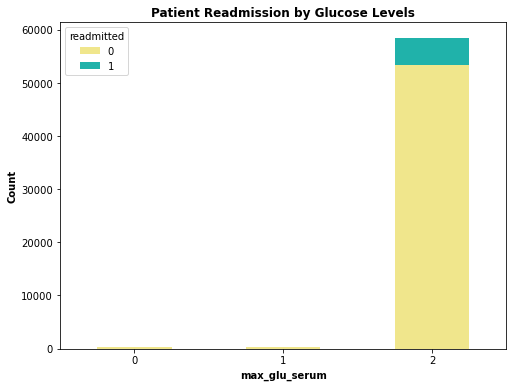

In [39]:
# redefine glucose levels under the following guidelines
# 0: patient's blood glucose levels are normal
# 1: patient's blood glucose levels indicate the diabetic levels (>200 and >300)
# 2: no blood glucose test was performed
df_readmission['max_glu_serum'] = df_readmission['max_glu_serum'].replace({"Norm":0,
                                                                          ">200":1,
                                                                          ">300":1,
                                                                          "None":2})

# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['max_glu_serum'].value_counts())

# display distribution of new mapped glucose levels 
sns.countplot(y = df_readmission['max_glu_serum'])
plt.title("Patient's Glucose Levels", fontweight='bold')
plt.ylabel("max_glu_serum",fontweight='bold')
plt.xlabel("Count", fontweight='bold')
plt.show()

# stacked bar graph showing the distribution of the 'max_glu_serum' & 'readmitted' variables
tbl = pd.pivot_table(df_readmission.groupby(['max_glu_serum','readmitted']).size().reset_index(),
values=0,
index='max_glu_serum',
columns=['readmitted'],
aggfunc=np.sum)
tbl.plot(kind='bar',
         stacked=True,
         color=['khaki', 'lightseagreen'],
         figsize=(8,6))
plt.title("Patient Readmission by Glucose Levels", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("max_glu_serum", fontweight='bold')
plt.xticks(rotation=0)
plt.show()

<b><u>Feature: A1Cresult</u></b>

In [40]:
# display the unique labels along with the value count
# this feature indicates the range of the results of A1C test if taken
print("Unique Labels and Distribution of Values")
print(df_readmission['A1Cresult'].value_counts())

Unique Labels and Distribution of Values
None    48243
>8       5044
Norm     3355
>7       2416
Name: A1Cresult, dtype: int64


Unique Labels and Distribution of Values
2    48243
1     7460
0     3355
Name: A1Cresult, dtype: int64


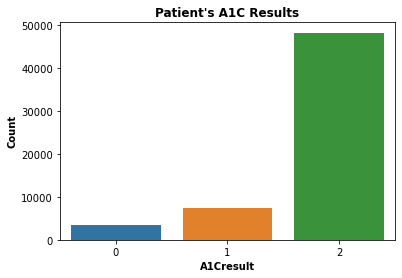

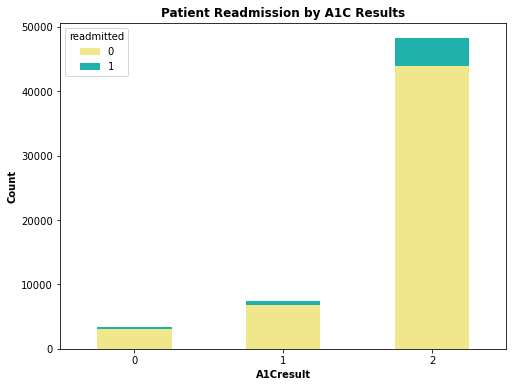

In [41]:
# redefine A1C results under the following guidelines
# 0: patient's A1C results are normal
# 1: patient's A1C results are >7 or >8
# 2: no A1C test was performed
df_readmission['A1Cresult'] = df_readmission['A1Cresult'].replace({"Norm":0,
                                                                          ">7":1,
                                                                          ">8":1,
                                                                          "None":2})

# display the unique labels along with the value count
print("Unique Labels and Distribution of Values")
print(df_readmission['A1Cresult'].value_counts())

# display updated A1C results distribution
sns.countplot(df_readmission['A1Cresult'])
plt.title("Patient's A1C Results", fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.xlabel("A1Cresult", fontweight='bold')
plt.show()

# stacked bar graph showing the distribution of the 'A1Cresult' & 'readmitted' variables
tbl = pd.pivot_table(df_readmission.groupby(['A1Cresult','readmitted']).size().reset_index(),
values=0,
index='A1Cresult',
columns=['readmitted'],
aggfunc=np.sum)
tbl.plot(kind='bar',
         stacked=True,
         color=['khaki', 'lightseagreen'],
         figsize=(8,6))
plt.title("Patient Readmission by A1C Results", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("A1Cresult", fontweight='bold')
plt.xticks(rotation=0)
plt.show()

<b><u>Feature: change</u></b>

Unique Labels and Distribution of Values
No    32197
Ch    26861
Name: change, dtype: int64


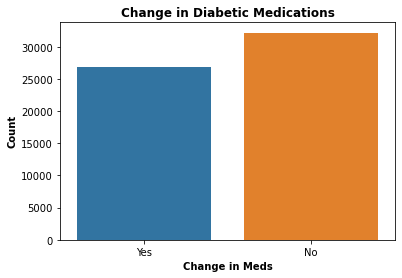

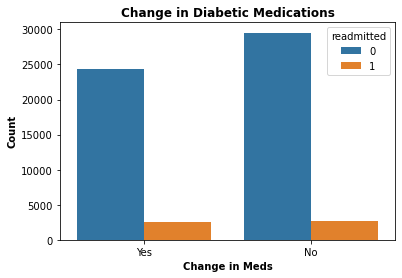

In [42]:
# display the unique labels along with the value count
# this feature indicates the change in diabetic medications(either dosage or generic name)
print("Unique Labels and Distribution of Values")
print(df_readmission['change'].value_counts())

# redefine 'Ch' label as Yes denoting change in diabetic medication
df_readmission.change = df_readmission.change.replace("Ch", "Yes")

# display the distribution of values
sns.countplot(df_readmission['change'])
plt.title("Change in Diabetic Medications", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Change in Meds", fontweight='bold')
plt.show()

# display distribution of medication changes in relation to rehospitalization status
sns.countplot(x = "change",
              hue = "readmitted",
              data = df_readmission)
plt.title("Change in Diabetic Medications", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Change in Meds", fontweight='bold')
plt.show()

<b><u>Feature: diabetesMed</u></b>

Unique Labels and Distribution of Values
Yes    45184
No     13874
Name: diabetesMed, dtype: int64


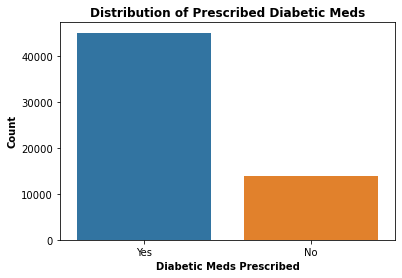

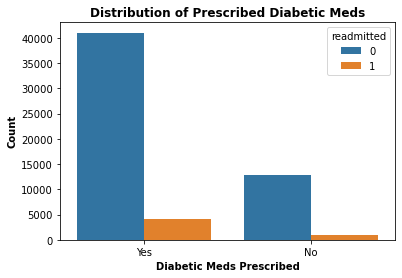

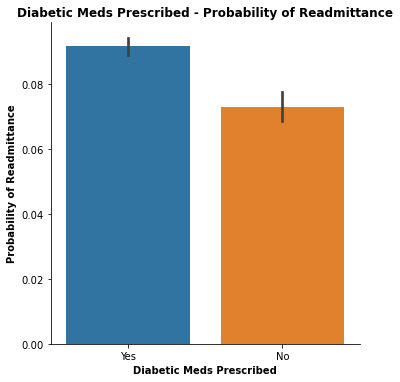

In [43]:
# display the unique labels along with the value count
# this feature indicates if there was any diabetic medication prescribed
print("Unique Labels and Distribution of Values")
print(df_readmission['diabetesMed'].value_counts())

# display the distribution of values
sns.countplot(df_readmission['diabetesMed'])
plt.title("Distribution of Prescribed Diabetic Meds", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Diabetic Meds Prescribed", fontweight='bold')
plt.show()

# display distribution of prescribed meds in relation to rehospitalization status
sns.countplot(x = "diabetesMed",
              hue = "readmitted",
              data = df_readmission)
plt.title("Distribution of Prescribed Diabetic Meds", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Diabetic Meds Prescribed", fontweight='bold')
plt.show()

# display whether diabetic meds are prescribed and the probability of readmittance 
sns.catplot(x = "diabetesMed",
            y = "readmitted",
            data = df_readmission,
            kind = "bar")
plt.title("Diabetic Meds Prescribed - Probability of Readmittance", fontweight='bold')                    
plt.ylabel("Probability of Readmittance", fontweight='bold')
plt.xlabel("Diabetic Meds Prescribed", fontweight='bold')
plt.show()

<b><u>Prepare Data Frame for Modelling </u></b>

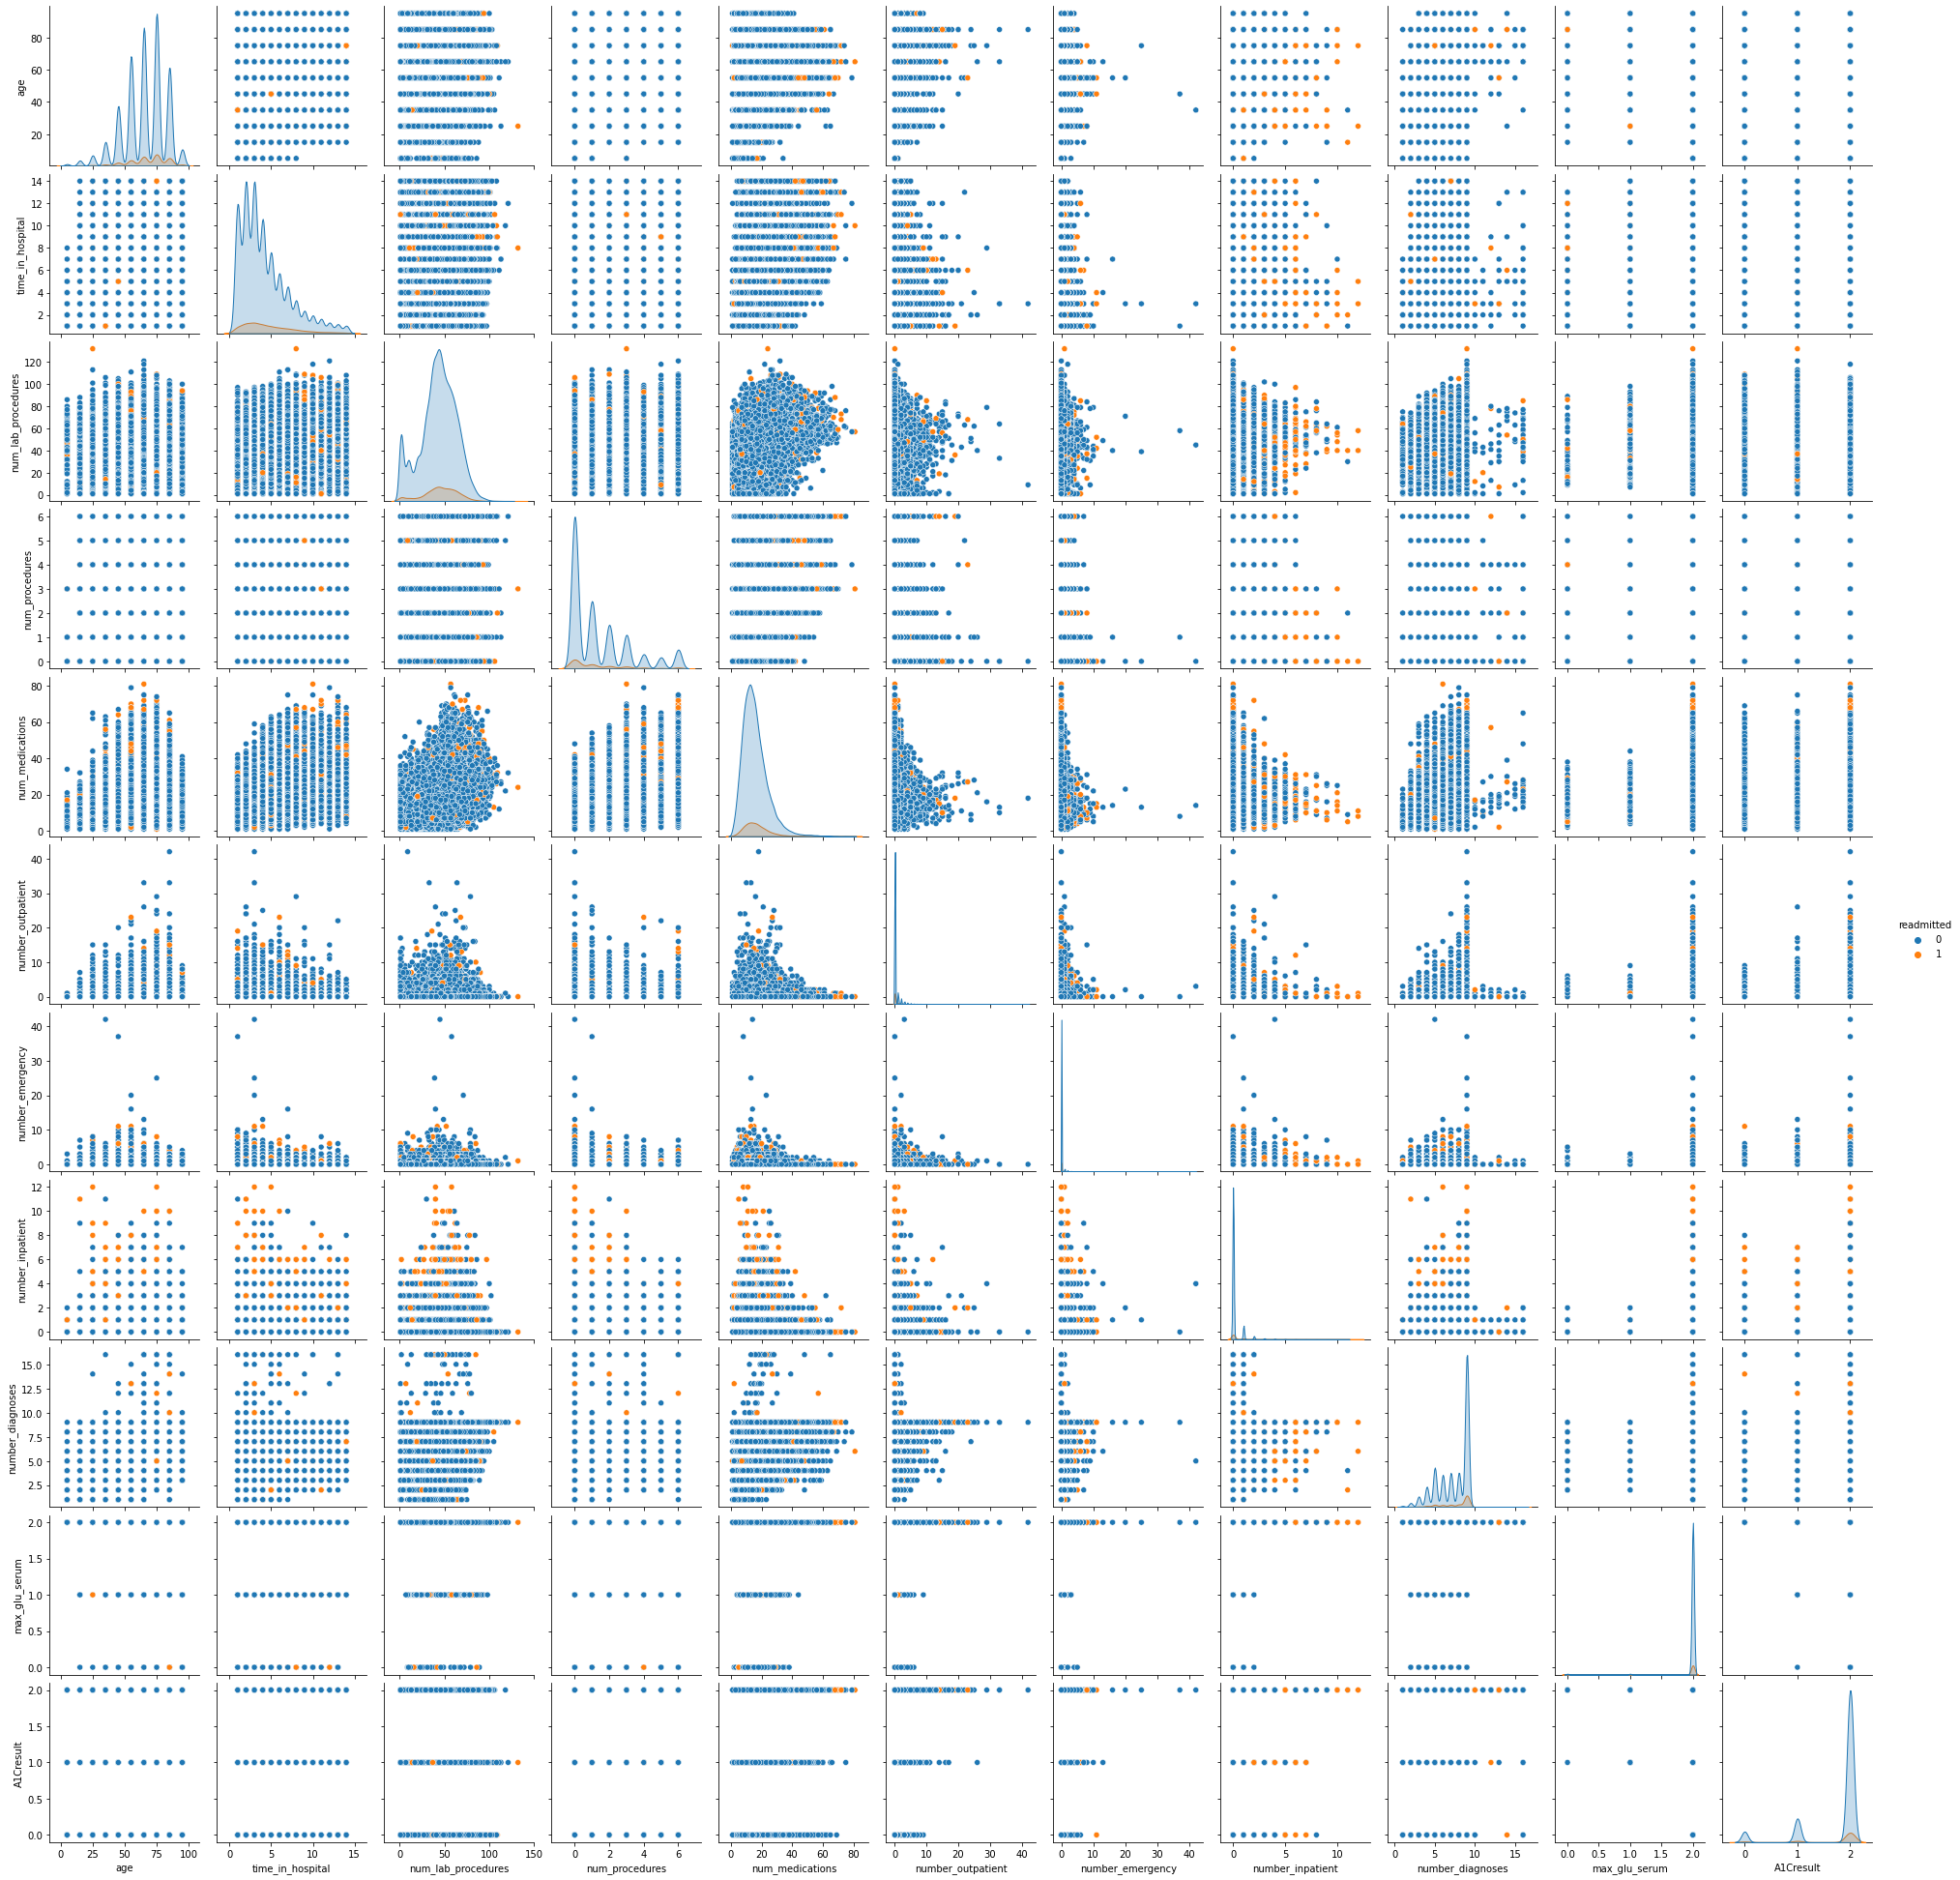

In [45]:
# create a pairplot to visualize any correlations between features
sns.pairplot(df_readmission, hue='readmitted')

In [46]:
# transform all binary/categorical variables into numeric values
df_readmission = pd.get_dummies(data=df_readmission, columns=['race','gender','admission_type_id',
                                                              'discharge_disposition_id','admission_source_id', 
                                                              'diag_1','change','diabetesMed'], drop_first=False)

df_readmission = df_readmission.astype(float)

# display the updated shape of the dataset
df_readmission.shape

(59058, 40)

In [47]:
# return updated df info
df_readmission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59058 entries, 1 to 101765
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          59058 non-null  float64
 1   time_in_hospital                             59058 non-null  float64
 2   num_lab_procedures                           59058 non-null  float64
 3   num_procedures                               59058 non-null  float64
 4   num_medications                              59058 non-null  float64
 5   number_outpatient                            59058 non-null  float64
 6   number_emergency                             59058 non-null  float64
 7   number_inpatient                             59058 non-null  float64
 8   number_diagnoses                             59058 non-null  float64
 9   max_glu_serum                                59058 non-null  float64
 1

In [48]:
# export a copy of the prepared/cleaned data set
df_readmission.to_csv('df_cleaned.csv', index=False)

## <center> Model Building </center>

<b> Purpose of this data analysis: </b>

The goal of this data analysis is to utilize logistic regression methods - a familiar classification algorithm - to determine the rehospitalization status of diabetic patients. Ultimately, analysts would like to gain insight on the possibility of predicting readmission status using attributes reported during said patient's initial encounter at a medical facility.

<b> Why logistic regression? </b>

Logistic regression can be defined as "a classification algorithm used to predict a binary outcome based on a set of independent variables" (Thanda, 2021, p.2). With that being said, the purpose of this project is to use a logistic regression model to explain the relationship between a single dependent binary variable, in our case, 'readmitted', and the explanatory variables of the diabetic medical dataset. Moreover, logistic regression is a predictive analysis used specifically for classification problems. This particular model type will allow us to create a controlled experiment using "logarithmic transformations on the outcome variable to model a nonlinear association in a linear way" (Zeigler, 2017, p.3).


<b> Assumptions of a logistic regression model: </b>
- The response variable is binary.
- Observations within the dataset are independent of each other.
- There is little to no multicollinearity amongst explanatory variables.
- The model should be fitted correctly including only meaningful variables and free of extreme outliers.
- There is a linear relationship between explanatory variables and the logit of the response variable.
- Requires the sample size to be sufficiently large.

### Initial Logistic Regression Model

In [49]:
# construct inital logistic regression model
# define input variable (X) & output variable
init_model = df_readmission

X = init_model.drop('readmitted', axis = 1)
Y = init_model[['readmitted']]

# split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)

# create a Logistic Regression model object
regression_model = LogisticRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# define input
X2 = sm.add_constant(X)

# create a model
model = sm.Logit(Y, X2)

# fit the data
est = model.fit()

# print out a summary
print(est.summary())

         Current function value: 0.287087
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                59058
Model:                          Logit   Df Residuals:                    59026
Method:                           MLE   Df Model:                           31
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                 0.03134
Time:                        14:52:57   Log-Likelihood:                -16955.
converged:                      False   LL-Null:                       -17503.
Covariance Type:            nonrobust   LLR p-value:                9.863e-211
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          12.5185        nan        nan  

In [51]:
# return predictions of initial logistic regression model
y_hat_train = regression_model.predict(X_train)
y_hat_test = regression_model.predict(X_test)

print("Initial Model Predictions")
print("")
print(classification_report(y_test, y_hat_test))

Initial Model Predictions

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     10783
         1.0       0.50      0.00      0.01      1029

    accuracy                           0.91     11812
   macro avg       0.71      0.50      0.48     11812
weighted avg       0.88      0.91      0.87     11812



,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,diag_1_Genitourinary,diag_1_Injury,diag_1_Muscoloskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,change_No,change_Yes,diabetesMed_No,diabetesMed_Yes
age,1.000000,0.125816,0.034246,-0.018729,0.058449,0.024644,-0.047012,0.018609,0.267175,-0.023719,...,0.027944,0.041955,0.004811,0.027503,-0.072709,0.030363,0.036269,-0.036269,0.025507,-0.025507
time_in_hospital,0.125816,1.000000,0.333659,0.187123,0.473954,-0.008272,-0.008296,0.057025,0.244981,-0.004601,...,-0.016465,0.021284,-0.033099,0.068751,0.045202,-0.020301,-0.116560,0.116560,-0.072478,0.072478
num_lab_procedures,0.034246,0.333659,1.000000,0.034193,0.270746,0.019936,0.022220,0.068375,0.158183,0.085286,...,0.032878,-0.029930,-0.131251,-0.031287,-0.005333,0.022585,-0.087053,0.087053,-0.050203,0.050203
num_procedures,-0.018729,0.187123,0.034193,1.000000,0.394049,-0.014046,-0.036186,-0.027964,0.084263,0.039539,...,-0.049399,0.023789,0.037337,0.085497,-0.153178,-0.169081,-0.007386,0.007386,0.007397,-0.007397
num_medications,0.058449,0.473954,0.270746,0.394049,1.000000,0.025383,0.001054,0.037292,0.263036,0.005960,...,-0.037917,0.038774,0.113801,0.043300,-0.115694,-0.003120,-0.248610,0.248610,-0.188499,0.188499
number_outpatient,0.024644,-0.008272,0.019936,-0.014046,0.025383,1.000000,0.096421,0.083611,0.078323,-0.033214,...,0.013713,-0.009006,0.004883,0.005127,0.018931,-0.008215,-0.010513,0.010513,-0.013576,0.013576
number_emergency,-0.047012,-0.008296,0.022220,-0.036186,0.001054,0.096421,1.000000,0.154564,0.043497,-0.023528,...,0.006501,-0.007975,-0.009453,-0.020250,0.023755,0.009903,-0.022780,0.022780,-0.023895,0.023895
number_inpatient,0.018609,0.057025,0.068375,-0.027964,0.037292,0.083611,0.154564,1.000000,0.080620,0.022803,...,-0.006117,0.012550,-0.028384,-0.012701,0.036209,-0.005386,-0.011207,0.011207,-0.034715,0.034715
number_diagnoses,0.267175,0.244981,0.158183,0.084263,0.263036,0.078323,0.043497,0.080620,1.000000,-0.001796,...,0.032457,0.047145,-0.078363,-0.011985,0.018877,0.017252,-0.034176,0.034176,-0.010684,0.010684
max_glu_serum,-0.023719,-0.004601,0.085286,0.039539,0.005960,-0.033214,-0.023528,0.022803,-0.001796,1.000000,...,-0.001462,0.007023,0.014716,0.004407,0.004362,-0.020356,-0.004983,0.004983,-0.009968,0.009968


<AxesSubplot:>

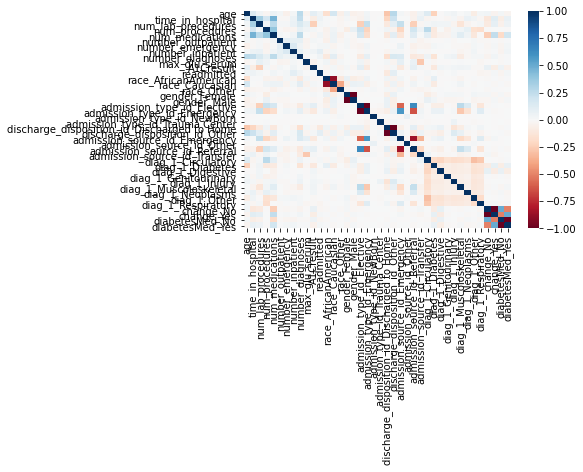

In [52]:
# test for multicollinearity
# calculate the correlation matrix
corr = init_model.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [53]:
# define a new dataframe for testing purposes
df = init_model

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(df)

# create the series 
series_initial = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

# display the series
print('DATA BEFORE Initial Reduction')
print('-'*100)
display(series_initial)

DATA BEFORE Initial Reduction
----------------------------------------------------------------------------------------------------


const                                          0.000000
age                                            1.280633
time_in_hospital                               1.506563
num_lab_procedures                             1.370873
num_procedures                                 1.402337
num_medications                                1.829115
number_outpatient                              1.028992
number_emergency                               1.044273
number_inpatient                               1.056280
number_diagnoses                               1.255475
max_glu_serum                                  1.105521
A1Cresult                                      1.097444
readmitted                                     1.022254
race_AfricanAmerican                                inf
race_Caucasian                                      inf
race_Other                                          inf
gender_Female                                       inf
gender_Male                                     

### Reduced  Logistic Regression Models

In [54]:
# recalculate for multicollinearity after dropping variables
# define new data frame from removed columns 
df2 = df.drop(['race_AfricanAmerican','race_Caucasian','race_Other',
                            'gender_Female','gender_Male','admission_type_id_Elective',
                            'admission_type_id_Emergency','admission_type_id_NewBorn','admission_type_id_Trauma Center',
                            'discharge_disposition_id_Discharged to Home','discharge_disposition_id_Other',
                            'admission_source_id_Emergency','admission_source_id_Other','admission_source_id_Referral',
                            'admission_source_id_Transfer','diag_1_Circulatory','diag_1_Diabetes',
                            'diag_1_Digestive','diag_1_Genitourinary','diag_1_Injury','diag_1_Muscoloskeletal',
                            'diag_1_Neoplasms','diag_1_Other','diag_1_Respiratory','change_No',
                            'change_Yes','diabetesMed_No','diabetesMed_Yes'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X2 = sm.tools.add_constant(df2)

# create the series 
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# compare previous test check with new test
# display the series
print('DATA BEFORE')
print('-'*100)
display(series_initial)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                          0.000000
age                                            1.280633
time_in_hospital                               1.506563
num_lab_procedures                             1.370873
num_procedures                                 1.402337
num_medications                                1.829115
number_outpatient                              1.028992
number_emergency                               1.044273
number_inpatient                               1.056280
number_diagnoses                               1.255475
max_glu_serum                                  1.105521
A1Cresult                                      1.097444
readmitted                                     1.022254
race_AfricanAmerican                                inf
race_Caucasian                                      inf
race_Other                                          inf
gender_Female                                       inf
gender_Male                                     

DATA AFTER
----------------------------------------------------------------------------------------------------


const                 193.233469
age                     1.103532
time_in_hospital        1.408175
num_lab_procedures      1.240635
num_procedures          1.202607
num_medications         1.553157
number_outpatient       1.022993
number_emergency        1.039171
number_inpatient        1.052060
number_diagnoses        1.187241
max_glu_serum           1.014036
A1Cresult               1.082110
readmitted              1.014090
dtype: float64

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,readmitted
age,1.000000,0.125816,0.034246,-0.018729,0.058449,0.024644,-0.047012,0.018609,0.267175,-0.023719,0.094077,0.044067
time_in_hospital,0.125816,1.000000,0.333659,0.187123,0.473954,-0.008272,-0.008296,0.057025,0.244981,-0.004601,-0.072668,0.052527
num_lab_procedures,0.034246,0.333659,1.000000,0.034193,0.270746,0.019936,0.022220,0.068375,0.158183,0.085286,-0.242182,0.027721
num_procedures,-0.018729,0.187123,0.034193,1.000000,0.394049,-0.014046,-0.036186,-0.027964,0.084263,0.039539,0.027772,-0.000427
num_medications,0.058449,0.473954,0.270746,0.394049,1.000000,0.025383,0.001054,0.037292,0.263036,0.005960,-0.023299,0.035583
number_outpatient,0.024644,-0.008272,0.019936,-0.014046,0.025383,1.000000,0.096421,0.083611,0.078323,-0.033214,0.029460,0.009334
number_emergency,-0.047012,-0.008296,0.022220,-0.036186,0.001054,0.096421,1.000000,0.154564,0.043497,-0.023528,0.002609,0.028178
number_inpatient,0.018609,0.057025,0.068375,-0.027964,0.037292,0.083611,0.154564,1.000000,0.080620,0.022803,0.040083,0.097883
number_diagnoses,0.267175,0.244981,0.158183,0.084263,0.263036,0.078323,0.043497,0.080620,1.000000,-0.001796,0.000591,0.045333
max_glu_serum,-0.023719,-0.004601,0.085286,0.039539,0.005960,-0.033214,-0.023528,0.022803,-0.001796,1.000000,-0.036381,0.001108


<AxesSubplot:>

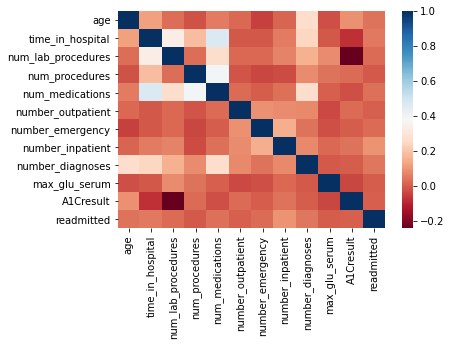

In [55]:
# rerun correlation matrix & heatmap
# calculate the correlation matrix
corr = df2.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [56]:
# construct reduced logistic regression model
# define input variable (X) & output variable
reduce_model = df2

X = reduce_model.drop('readmitted', axis = 1)
Y = reduce_model[['readmitted']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)

# create a logisitic regression model object
regression_model2 = LogisticRegression()

# pass through the X_train & y_train data set
regression_model2.fit(X_train, y_train)

LogisticRegression()

In [57]:
# define input
X3 = sm.add_constant(X)

# create a logistic model
model2 = sm.Logit(Y, X3)

# fit the data
est2 = model2.fit()

# print out a summary
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.290705
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                59058
Model:                          Logit   Df Residuals:                    59046
Method:                           MLE   Df Model:                           11
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                 0.01913
Time:                        14:58:01   Log-Likelihood:                -17168.
converged:                       True   LL-Null:                       -17503.
Covariance Type:            nonrobust   LLR p-value:                1.705e-136
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6288      0.210    -17.288      0.000      -4.040      -3.217
age  

In [58]:
# return predictions 
y_hat_train2 = regression_model2.predict(X_train)
y_hat_test2 = regression_model2.predict(X_test)

print("Reduced Model Predictions - Multicollinearity")
print("")
print(classification_report(y_test, y_hat_test2))

Reduced Model Predictions - Multicollinearity

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     10783
         1.0       0.55      0.01      0.01      1029

    accuracy                           0.91     11812
   macro avg       0.73      0.50      0.48     11812
weighted avg       0.88      0.91      0.87     11812



In [59]:
# reduced model using coefficients
# get the coefficient of the model and the intercept
intercept = regression_model2.intercept_[0]
coefficent = regression_model2.coef_[0][0]

print("The intercept for the model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model2.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for the model is -0.6633
----------------------------------------------------------------------------------------------------
The Coefficient for age is 0.0029
The Coefficient for time_in_hospital is 0.036
The Coefficient for num_lab_procedures is -1.2e-05
The Coefficient for num_procedures is -0.018
The Coefficient for num_medications is 0.0028
The Coefficient for number_outpatient is 0.003
The Coefficient for number_emergency is 0.043
The Coefficient for number_inpatient is 0.35
The Coefficient for number_diagnoses is 0.014
The Coefficient for max_glu_serum is -1.0
The Coefficient for A1Cresult is -0.092


In [60]:
# define input variable (X) & output variable
reduce_model2 = reduce_model.drop(['num_lab_procedures'], axis = 1)

X = reduce_model2.drop('readmitted', axis = 1)
Y = reduce_model2[['readmitted']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)

# create a logistic Regression model object
regression_model3 = LogisticRegression()

# pass through the X_train & y_train data set
regression_model3.fit(X_train, y_train)

LogisticRegression()

In [61]:
# define input
X4 = sm.add_constant(X)

# create a logistic model
model3 = sm.Logit(Y, X4)

# fit the data
est3 = model3.fit()

# print out logistic summary statistics
print(est3.summary())

Optimization terminated successfully.
         Current function value: 0.290715
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                59058
Model:                          Logit   Df Residuals:                    59047
Method:                           MLE   Df Model:                           10
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                 0.01910
Time:                        14:58:25   Log-Likelihood:                -17169.
converged:                       True   LL-Null:                       -17503.
Covariance Type:            nonrobust   LLR p-value:                3.677e-137
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6115      0.209    -17.250      0.000      -4.022      -3.201
age     

In [62]:
# return predictions 
y_hat_train3 = regression_model3.predict(X_train)
y_hat_test3 = regression_model3.predict(X_test)

print("Reduced Model Predictions - coefficients")
print("")
print(classification_report(y_test, y_hat_test3))

Reduced Model Predictions - coefficients

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     10783
         1.0       0.50      0.01      0.02      1029

    accuracy                           0.91     11812
   macro avg       0.71      0.50      0.48     11812
weighted avg       0.88      0.91      0.87     11812



In [63]:
# reduced Model using p-values (remove any attribute with p > 0.05)
# define input variable (X) & output variable
reduce_model3 = reduce_model2.drop(['number_outpatient','max_glu_serum','A1Cresult'], axis = 1)

X = reduce_model3.drop('readmitted', axis = 1)
Y = reduce_model3[['readmitted']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)

# create a logistic Regression model object
regression_model4 = LogisticRegression()

# pass through the X_train & y_train data set
regression_model4.fit(X_train, y_train)

LogisticRegression()

In [64]:
# define input
X5 = sm.add_constant(X)

# create a logistic model
model4 = sm.Logit(Y, X5)

# fit the data
est4 = model4.fit()

# print out logistic summary statistics
print(est4.summary())

Optimization terminated successfully.
         Current function value: 0.290732
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                59058
Model:                          Logit   Df Residuals:                    59050
Method:                           MLE   Df Model:                            7
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                 0.01904
Time:                        14:58:39   Log-Likelihood:                -17170.
converged:                       True   LL-Null:                       -17503.
Covariance Type:            nonrobust   LLR p-value:                1.180e-139
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.5082      0.083    -42.060      0.000      -3.672      -3.345
age        

<b>Justification of Variable Selection Procedure:</b>

The logistic regression portion of this data analysis began with the construction of an initial LR model and fitting the respective data to the newly constructed model. The initial logistic regression summary report presented a significant amount of features whose coefficients and p-values were higher than the expected outcome. To address this matter, there were multiple iterations of variable selections using several methods to develop a more fine-tuned, reduced model. 

The first model reduction took place by checking multicollinearity. Multicollinearity exists when "one of the explanatory variables is highly correlated with another explanatory variable. In essence, one of the X variables is almost perfectly correlated with another or multiple X variables" (Reed, 2019). The presence of multicollinearity becomes problematic in relation to the regression analysis as, "the coefficient estimates tend to be unreliable due to the standard errors of slope coefficients becoming artificially inflated. Additionally, the standard error is used to help calculate the p-value, leading to a higher probability that will incorrectly conclude that a variable is not statistically significant" (Reed, 2019).

Initially, to test for multicollinearity a correlation matrix and heap map of the prepared data frame was created. Because of the size of the data set, the heap map returned was too compacted. With the inability to decipher the chart and accurately pinpoint any highly correlated variables using this method, it was necessary to take another approach. 

To solve this issue, it was decided to use the VIF method to test for multicollinearity. The VIF, formally called, variance inflation factor, "is a measure of how much a particular variable is contributing to the standard error in the regression model. When significant multicollinearity exists, the variance inflation factor will be huge for the variables in the calculation" (Reed, 2019). After initializing the first round of the VIF check, all the categorical features yielded perfect/high correlations. Typically, one should remove any variable that returns a value of 5 or higher. In the model presented, there was a significant number of features yielding a value of inf (perfectly correlated) that would need to be removed. Following the removal of these features and rerun of the VIF check the results allows for the acceptance of the assumption that there is an absence of multicollinearity.

The assurance of the absence of multicollinearity, proceeded with the construction of another regression model based on the newly reduced data. To start, one must explicitly define the independent variables, in our case, all remaining variables excluding the 'readmitted' feature, and our dependent variable, 'readmitted'. Next, the data is split into a training and testing set. The purpose of this step is to handle any possible overfitting of the model and provide a more realistic evaluation of the model (Hossein, 2017). Following the splitting of the data, an instance of the logistic regression model is created and the X_train and y_train variables are passed through. At this point, the data is now fitted to the model. An updated logistic regression summary along with a classification report is presented. 

The continuation of analyzing/reducing our model involved outputting the intercept and coefficients. The newly reduced model yielded an intercept of -0.66. The intercept term is "the value of the dependent variable ('readmitted') when all the independent variables are equal to zero. For each slope coefficient, it is the estimated change in the dependent variable for one unit of change in that independent variable, holding the other independent variables constant" (Reed, 2019). The returned coefficients returned plausible results except for the 'num_lab_procedures' feature. With this attribute maintaining a high coefficient value it would need to be removed from the data frame. 

Next, with insight from the generated logistic regression summary, a final reduced model was constructed following the removal of specific features having p-values greater than 0.05. This was a vital step in the reduction process because those elevated p-values can be misleading creating an unsound model.

<b>Model Evaluation:</b>

In [65]:
# return predictions of final reduced model
y_hat_train4 = regression_model4.predict(X_train)
y_hat_test4 = regression_model4.predict(X_test)

print("Reduced Model FINAL Predictions - pvalues")
print("")
print(classification_report(y_test, y_hat_test4))

Reduced Model FINAL Predictions - pvalues

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     10783
         1.0       0.56      0.00      0.01      1029

    accuracy                           0.91     11812
   macro avg       0.73      0.50      0.48     11812
weighted avg       0.88      0.91      0.87     11812



In [66]:
# pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test4)
print(cnf_matrix)

[[10779     4]
 [ 1024     5]]


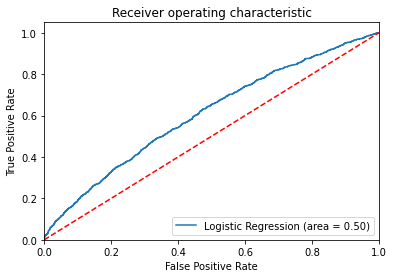

In [67]:
logit_roc_auc = roc_auc_score(y_test, regression_model4.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, regression_model4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<b>Explanation of Analysis Process/Model Evaluation:</b>

The data analysis process demonstrated in this project involved the selection of target variables that coincided with the assumptions of logistic regression models. The initial model included all the variables of the original dataset; however, many of those variables were quickly eliminated due to their perfect correlations amongst one another (multicollinearity). Next, using a more statistical approach, those predictor variables with elevated coefficients and p-values were also removed.   

Regarding the evaluation of the model, the initial LR model exhibited impressively accurate results in terms of predictions. In turn, the classification report of the final reduced model maintained the same level of accuracy. According to the classification report, the accuracy of the reduced model is approximately 91% followed by seemingly well precision and recall of our target variable 'readmitted' - (Yes:1 & No:0).

As a part of the model evaluation, there was the inclusion of a confusion matrix where the actual test and predicted target test as passed through to prediction of the outcomes of the function. The purpose of a confusion matrix is to provide a visual explanation of 1) accuracy - the proportion of the total number of predictions that were in fact correct 2) Positive predictive value or precision - the proportion of positive cases that were correctly identified 30 Negative predictive value - the proportion of negative vases that were correctly identified 4) sensitivity and/or recall - the proportion of actual positive cases which are correctly identified 5) specificity - the proportion of actual negative cases which are correctly identified (Massaron, 2016). 

The regression equation for the reduced model is as follows: 
<b> y = -3.51 + .01(age) + .04(time_in_hospital) - .02(num_procedures) + .01(num_medications) + .07(num_emergency) +.34(number_inpatient) + .04(number_diagnoses) </b>

As previously noted, the logistic regression analysis predicts a binary outcome based on a set of independent variables. The goal of this project was to use a logistic regression model to explain the relationship between a single dependent binary variable ('readmitted'), and the explanatory variables of the medical dataset. Based on the reduced model and the returned intercept and coefficients, if all independent variables were equal to zero, then the 'readmitted' would be return a negative value of approximately 3.51. Looking at the 'time_in_hospital' feature while holding all other independent variables constant, then one would say for a single unit increase in 'time_in_hospital' would lead to a 4% increase in 'readmitted'. In return, one can use this equation to answer the research question of this analysis of what attributes exhibits the strongest contribution to the prediction of rehospitalizations amongst diabetic patients.

Formally known as the receiver operating characteristic curve, the ROC curve gives of a visual representation of how well a model fits the data and how accurate the predications are. This curve, "is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)" (Li, 2017, p.3). In the model depicted in this analysis, the ROC curve proves to be a well/strong performing model.

## <center> Supplementary Information </center>

In accordance with the supplemental data dictionary the labels associated with the admission type ids are denoted below along with the re-encoded labels:

<center><b> Data Dictionary - Admission Type IDs </b></center>

|ID #|Description|Mapped Description|
|--------|--------|--------|
|1|Emergency|Emergency|
|2|Urgent|Emergency|
|3|Elective|Elective|
|4|Newborn|Newborn|
|5|Not Available|np.nan|
|6|Null|np.nan|
|7|Trauma Center|Trauma Center|
|8|Not Mapped|np.nan|

For the purpose of model building, admission type ID numbers 5,6, and 8 were replaced with the numPy's nan value. Since Emergency and Urgent have the same meaning, those ID types were combined into a single Emergency ID.

<center><b> Data Dictionary - Discharge Disposition ID </b></center>

|ID #|Description|Mapped Description|
|--------|--------|--------|
|1|Discharged to home|Discharged - Home|
|2|Discharged/transferred to another short term hospital|Other|
|3|Discharged/transferred to SNF|Other|
|4|Discharged/transferred to ICF|Other|
|5|Discharged/transferred to another type of inpatient care|Other|
|6|Discharged/transferred to home w/home health service|Discharged - Home|
|7|Left AMA|Other|
|8|Discharged/transferred to home under care of Home IV provider|Discharged - Home|
|9|Admitted as an inpatient to this hospital|Other|
|10|Neonate discharged to another hospital for neonatal aftercare|Other|
|11|Expired|Other|
|12|Sill patient or expected to return for outpatient services|Other|
|13|Hospice/home|Discharged - Home|
|14|Hospice/medical facility|Other|
|15|Discharged/transferred within this institution to Medicare approved swing bed|Other|
|16|Discharged/transferred/referred another institution for outpatient services|Other|
|17|Discharged/transferred/referred to this institution for outpatient services|Other|
|18|NULL|np.nan|
|19|Expired at home. Medicaid only, hospice|Discharged - Home|
|20|Expired in a medical facility. Medicaid only, hospice|Other|
|22|Discharged/transferred to another rehab facility including rehab units of a hospital|Other|
|23|Discharged/transferred to a long term care hospital|Other|
|24|Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare|Other|
|25|Not Mapped|np.nan|
|27|Discharged/transferred to another type of health care institution not defined elsewhere|Other|
|28|Discharged/transferred to a federal health care facility|Other|

<center><b> Data Dictionary - Admission Source ID </b></center>

|ID #|Description|Mapped Description|
|--------|--------|--------|
|1|Pysician Referral|Referral|
|2|Clinic Referral|Referral|
|3|HMO Referral|Referral|
|4|Transfer from a hospital|Transfer|
|5|Transfer from a SNF|Transfer|
|6|Transfer from another health care facility|Transfer|
|7|Emergency Room|Emergency|
|8|Court/Law Enforcement|Other|
|9|Not Available|np.nan|
|10|Transfer from critical access hospital|Transfer|
|11|Normal Delivery|Other|
|13|Sick Baby|Other|
|14|Extramural Birth|Other|
|17|Transfer from another home health agency|Transfer|
|20|Unknown/Invalid|np.nan|
|22|Born inside this hospital|Other|
|25|Transfer from Hospice|Transfer|